# Exoplanet Classification Data Prep

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 75)

### Read Data

In [2]:
cumulativeOOI = pd.read_csv('./data/cumulativeooi.csv')

In [3]:
cumulativeOOI.head(5)

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disp_prov,koi_comment,koi_period,koi_time0bk,koi_time0,koi_eccen,koi_longp,koi_impact,koi_duration,koi_ingress,koi_depth,koi_ror,koi_srho,koi_fittype,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_limbdark_mod,koi_ldm_coeff4,koi_ldm_coeff3,koi_ldm_coeff2,...,koi_quarters,koi_bin_oedp_sig,koi_trans_mod,koi_model_dof,koi_model_chisq,koi_datalink_dvr,koi_datalink_dvs,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_sage,koi_sparprov,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Active,8/16/2018,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,170.538750,2455003.539,0.0,NaN,0.146,2.95750,NaN,616.0,0.022344,3.20796,LS+MCMC,2.26,0.0853,89.66,793.0,93.59,24.810,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,...,1.111110e+31,0.6864,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-001-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,48.14191,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Active,8/16/2018,CANDIDATE,0.969,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,162.513840,2454995.514,0.0,NaN,0.586,4.50700,NaN,875.0,0.027954,3.02368,LS+MCMC,2.83,0.2734,89.57,443.0,9.11,77.900,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,...,1.111110e+31,0.0023,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-002-2016...,5455.0,4.467,0.14,0.927,0.919,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.003,19.462265,48.14199,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,3,10811496,K00753.01,NaN,CANDIDATE,Active,8/16/2018,CANDIDATE,0.000,0,0,0,0,q1_q17_dr25_sup_koi,DEEP_V_SHAPED,19.899140,175.850252,2455008.850,0.0,NaN,0.969,1.78220,NaN,10800.0,0.154046,7.29555,LS+MCMC,14.60,0.1419,88.96,638.0,39.30,53.500,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2711,...,1.111110e+31,0.6624,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010811/010811496/dv/kplr010811496-20160209...,010/010811/010811496/dv/kplr010811496-001-2016...,5853.0,4.544,-0.18,0.868,0.961,NaN,q1_q17_dr25_stellar,297.00482,48.134129,15.436,15.943,15.390,15.220,15.166,14.254,13.900,13.826,0.278,19.800321,48.13412,-0.021,-0.038,0.00070,0.00060,-0.025,-0.034,0.042,0.002,-0.027,0.027
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Active,8/16/2018,FALSE POSITIVE,0.000,0,1,0,0,q1_q17_dr25_sup_koi,MOD_ODDEVEN_DV---MOD_ODDEVEN_ALT---DEEP_V_SHAPED,1.736952,170.307565,2455003.308,0.0,NaN,1.276,2.40641,NaN,8080.0,0.387394,0.22080,LS+MCMC,33.46,0.0267,67.09,1395.0,891.96,3.278,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2865,...,1.111110e+31,0.0000,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010848/010848459/dv/kplr010848459-20160209...,010/010848/010848459/dv/kplr010848459-001-2016...,5805.0,4.564,-0.52,0.791,0.836,NaN,q1_q17_dr25_stellar,285.53461,48.285210,15.597,16.100,15.554,15.382,15.266,14.326,13.911,13.809,0.000,19.035638,48.28521,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,Active,8/16/2018,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,2.525592,171.595550,2455004.596,0.0,NaN,0.701,1.65450,NaN,603.0,0.024064,1.98635,LS+MCMC,2.75,0.0374,85.41,1406.0,926.16,8.750,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2844,...,1.111110e+30,0.3090,Mandel and Agol (2002 ApJ 580 171)

In [4]:
cumulativeOOI.describe()

,rowid,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_time0,koi_eccen,koi_longp,koi_impact,koi_duration,koi_ingress,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_ldm_coeff4,koi_ldm_coeff3,koi_ldm_coeff2,koi_ldm_coeff1,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_quarters,koi_bin_oedp_sig,koi_model_dof,koi_model_chisq,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_sage,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
count,9564.000000,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9.564000e+03,9201.0,0.0,9201.000000,9564.000000,0.0,9.201000e+03,9201.000000,9243.000000,9201.000000,9201.000000,9200.000000,9201.000000,9.243000e+03,9201.000000,9201.0,9201.0,9201.000000,9201.000000,8422.000000,8422.000000,9201.000000,9564.000000,8422.000000,9218.000000,8.422000e+03,8054.000000,0.0,0.0,9201.000000,9201.000000,9178.000000,9201.000000,9201.000000,0.0,9564.000000,9564.000000,9563.000000,9523.000000,9555.000000,9410.000000,8951.000000,9539.000000,9539.000000,9539.00000,8488.000000,9058.000000,9058.000000,9109.000000,9109.000000,8734.000000,8747.000000,8965.000000,8965.000000,8965.000000,8994.000000,8994.000000,8994.000000
mean,4782.500000,7.690628e+06,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,166.183251,2.454999e+06,0.0,NaN,0.735105,5.621606,NaN,2.379245e+04,0.283646,9.164414,102.891778,0.223989,82.469147,1085.385828,7.745737e+03,76.736333,0.0,0.0,0.254439,0.407617,176.846052,1025.664672,259.895001,1.406315,385.006768,1.243654,9.151387e+30,0.409500,NaN,NaN,5706.823280,4.310157,-0.124431,1.728712,1.023706,NaN,292.060163,43.810433,14.264606,14.830501,14.221565,14.075138,13.991724,12.993311,12.620604,12.54341,0.150994,19.471356,43.829239,-0.316136,-0.165817,-0.000097,-0.000714,-0.012281,-0.045420,1.866561,-0.024244,-0.076749,1.812566
std,2761.033321,2.653459e+06,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,67.918960,6.791896e+01,0.0,NaN,3.348832,6.471554,NaN,8.224316e+04,3.306558,53.807967,3077.639126,0.566359,15.223627,856.351161,1.592047e+05,845.274598,0.0,0.0,0.064806,0.106076,770.902357,4154.121620,795.806615,0.873289,545.756200,0.664573,4.153749e+30,0.500793,NaN,NaN,796.857947,0.432606,0.282111,6.127185,0.349447,NaN,4.766657,3.601243,1.385448,1.501885,1.383713,1.292573,1.230351,1.291912,1.267215,1.26818,0.252648,0.319158,3.599553,20.254777,20.534655,0.058225,0.092987,2.406550,2.573558,2.988742,2.382286,2.553758,2.986376
min,1.000000,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,120.515914,2.454954e+06,0.0,NaN,0.000000,0.052000,NaN,0.000000e+00,0.001289,0.000040,0.080000,0.005900,2.290000,25.000000,0.000000e+00,0.373000,0.0,0.0,-0.120600,0.125400,2.417437,7.105086,0.000000,1.000000,0.000000,1.000000,1.000000e+15,-1.000000,NaN,NaN,2661.000000,0.047000,-2.500000,0.109000,0.000000,NaN,279.852720,36.577381,6.966000,7.225000,7.101000,7.627000,6.702000,4.097000,3.014000,2.31100,0.000000,18.657036,36.576888,-742.430000,-417.900000,-4.000000,-6.000000,-25.100000,-75.900000,0.000000,-27.800000,-76.600000,0.000000
25%,2391.750000,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,132.761718,2.454966e+06,0.0,NaN,0.197000,2.437750,NaN,1.600000e+02,0.012341,0.229250,1.400000,0.037700,83.920000,539.000000,2.015000e+01,5.358000,0.0,0.0,0.228600,0.326800,3.997856,10.733030,12.000000,1.000000,41.000000,1.000000,1.111100e+31,0.134650,NaN,NaN,5310.000000,4.218000,-0.260000,0.829000,0.845000,NaN,288.660770,40.777173,13.440000,13.896500,13.393000,13.294000,13.276000,12.253000,11.914500,11.84300,0.000000,19.243889,40.798688,-0.600000,-0.680000,-0.000210,-0.000220,-0.320000,-0.387000,0.170000,-0.

In [5]:
cumulativeOOI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 83 columns):
rowid                9564 non-null int64
kepid                9564 non-null int64
kepoi_name           9564 non-null object
kepler_name          2299 non-null object
koi_disposition      9564 non-null object
koi_vet_stat         9564 non-null object
koi_vet_date         9564 non-null object
koi_pdisposition     9564 non-null object
koi_score            8054 non-null float64
koi_fpflag_nt        9564 non-null int64
koi_fpflag_ss        9564 non-null int64
koi_fpflag_co        9564 non-null int64
koi_fpflag_ec        9564 non-null int64
koi_disp_prov        9564 non-null object
koi_comment          8355 non-null object
koi_period           9564 non-null float64
koi_time0bk          9564 non-null float64
koi_time0            9564 non-null float64
koi_eccen            9201 non-null float64
koi_longp            0 non-null float64
koi_impact           9201 non-null float64
koi_duration 

#### Drop Features
Features with the following characteristics will be dropped from the dataset:
- all NULL or Zeroes
- categorial features which offer no predictive ability
- inject leakage

In [6]:
#Drop Columns with all zeroes
cumulativeOOI = cumulativeOOI.drop(['koi_longp', 'koi_ingress', 'koi_model_dof', 'koi_model_chisq', 'koi_sage'], axis=1)

In [7]:
#Drop attributes with no predictive capability
cumulativeOOI = cumulativeOOI.drop(['rowid', 'kepoi_name', 'koi_comment', 'koi_limbdark_mod', 'koi_parm_prov', 'koi_trans_mod', 'koi_datalink_dvr', 'koi_datalink_dvs'], axis=1)

In [8]:
#Drop Columns which inject Leakage
cumulativeOOI = cumulativeOOI.drop(['koi_pdisposition', 'kepler_name', 'koi_score'], axis=1)

In [9]:
#Drop other categorical columns for first pass modeling
cumulativeOOI = cumulativeOOI.drop(['koi_tce_delivname', 'koi_sparprov'], axis=1)

### Uniqueness
The uniques of each column will be examined as well.  Columns with low or zero variance will be removed from the dataset.

In [10]:
df = cumulativeOOI.nunique(dropna = False)
print(df)

kepid               8214
koi_disposition        3
koi_vet_stat           1
koi_vet_date           1
koi_fpflag_nt          3
koi_fpflag_ss          2
koi_fpflag_co          2
koi_fpflag_ec          2
koi_disp_prov          1
koi_period          9564
koi_time0bk         9538
koi_time0           7445
koi_eccen              2
koi_impact          2407
koi_duration        7834
koi_depth           2854
koi_ror             8503
koi_srho            9003
koi_fittype            4
koi_prad            2989
koi_sma             3797
koi_incl            2261
koi_teq             2512
koi_insol           7802
koi_dor             6211
koi_ldm_coeff4         2
koi_ldm_coeff3         2
koi_ldm_coeff2      1081
koi_ldm_coeff1      1323
koi_max_sngle_ev    8422
koi_max_mult_ev     8423
koi_model_snr       2741
koi_count              7
koi_num_transits    1628
koi_tce_plnt_num       9
koi_quarters         118
koi_bin_oedp_sig    4876
koi_steff           2446
koi_slogg           1558
koi_smet             120


In [11]:
#Drop Columns with zero or near zero variance
cumulativeOOI = cumulativeOOI.drop(['koi_vet_stat', 'koi_vet_date', 'koi_disp_prov', 'koi_ldm_coeff3', 'koi_ldm_coeff4'], axis=1)

In [12]:
#cumulativeOOI.koi_ldm_coeff4.unique()

#### Correlation

The condensed distance matrix must contain only finite values.


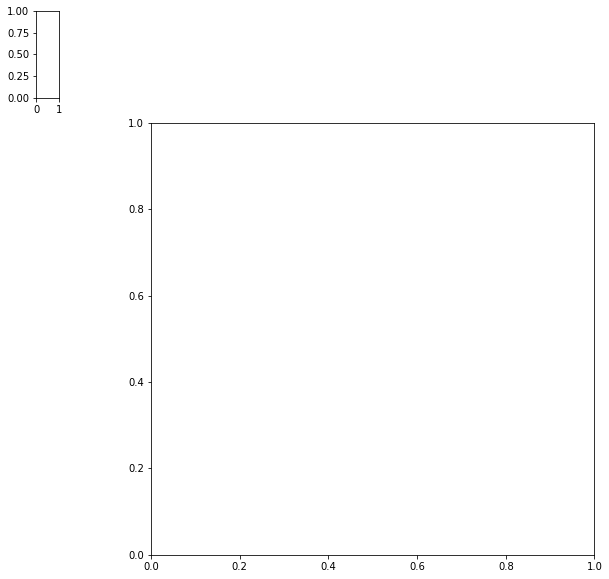

In [49]:
#Create Correlation Matrix Plot
try:
    df = cumulativeOOI.drop(['koi_eccen'], axis=1)
    sns.clustermap(df.corr())
    plt.show()
except Exception as e:
    print(e)

#### One Hot Encoding of koi_fittype

In [13]:
#Creating Dummy variables for categorical variable 'Primary' positions
#df2 = pd.get_dummies(df.Primary,prefix='Prim', prefix_sep='_')
#df = df.join(df2, how='inner')
#df.drop(['Primary'], axis=1, inplace=True)
fittypeEncode = pd.get_dummies(cumulativeOOI.koi_fittype, prefix="ENC", prefix_sep="_")
cumulativeOOI = cumulativeOOI.join(fittypeEncode, how='inner')
cumulativeOOI.drop(['koi_fittype'], axis=1, inplace=True)

#### Label Substitution for koi_disposition
- False Positive = 0
- Confirmed = 1
- Candidate = 2

In [14]:
print(np.unique(cumulativeOOI.koi_disposition))

['CANDIDATE' 'CONFIRMED' 'FALSE POSITIVE']


In [15]:
l = 'koi_disposition'

label = 2
counter = 0
tmpArray = np.unique(cumulativeOOI[l])
    
for t in tmpArray:
    print(l, tmpArray[label], counter)
    cumulativeOOI[l] = np.where(cumulativeOOI[l] == tmpArray[label], counter, cumulativeOOI[l])
    counter += 1
    label -= 1


koi_disposition FALSE POSITIVE 0
koi_disposition CONFIRMED 1
koi_disposition CANDIDATE 2


### Missing Values

#### Missing Values Function
Most machine learning algorithms do not accomodate to missing values.  The amount and degree of missingness is assesed below.

In [16]:
def rptMissingValues(df):
    try:
        del df2
    except:
        pass
    
    df2 = df.isnull().sum()
    df2 = df2[df2 > 0]
    df2 = pd.DataFrame({
        'n Missing' : df2,
        '% Missing' : ((df2 / df.shape[0])*100).round(2)})

    cm = sns.light_palette("red", as_cmap=True)
    df2.style.background_gradient(cmap=cm)
    return df2.style.background_gradient(cmap=cm);

In [17]:
mv = rptMissingValues(cumulativeOOI)
mv

,% Missing,n Missing
koi_eccen,3.8,363
koi_impact,3.8,363
koi_depth,3.8,363
koi_ror,3.8,363
koi_srho,3.36,321
koi_prad,3.8,363
koi_sma,3.8,363
koi_incl,3.81,364
koi_teq,3.8,363
koi_insol,3.36,321


#### Fill Missing Values with Zeroes
One simple approach to solving for missing values is to fill all NULLs with zero.  If the missing values are valid missing values, this could be a good approach to solve for this issue.  However, filling all NULLs with zero could have adverse impacts when classifying data which is not part of the training dataset.

In [18]:
cumulativeFill = cumulativeOOI.fillna(value=0)

mv2 = rptMissingValues(cumulativeFill)
mv2

,% Missing,n Missing


Kepler object of interest 2306756 has several missing values.  It will be spot checked to verify missing values where correctly filled.

In [19]:
cumulativeFill[cumulativeFill.kepid == 2306756]

,kepid,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_time0,koi_eccen,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_ldm_coeff2,koi_ldm_coeff1,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_quarters,koi_bin_oedp_sig,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky,ENC_LS,ENC_LS+MCMC,ENC_MCMC,ENC_none
24,2306756,0,0,1,0,0,386.603053,166.342079,2454999.342,0.0,0.9765,6.8057,24900.0,0.240528,4.63335,41.5,1.0719,89.95,297.0,1.84,332.0,0.2251,0.4707,0.0,0.0,994.0,1,0.0,1.0,0.0,0.0,5543.0,4.081,0.44,1.58,1.103,292.27374,37.671558,12.394,12.933,12.322,12.163,12.094,11.151,10.808,10.72,0.002,19.484915,37.671579,-0.008,0.067,-0.0007,0.0006,0.001,0.037,0.037,0.001,0.163,0.163,0,0,1,0


In [20]:
cumulativeOOI[cumulativeOOI.kepid == 2306756]

,kepid,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_time0,koi_eccen,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_ldm_coeff2,koi_ldm_coeff1,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_quarters,koi_bin_oedp_sig,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky,ENC_LS,ENC_LS+MCMC,ENC_MCMC,ENC_none
24,2306756,0,0,1,0,0,386.603053,166.342079,2454999.342,0.0,0.9765,6.8057,24900.0,0.240528,4.63335,41.5,1.0719,89.95,297.0,1.84,332.0,0.2251,0.4707,NaN,NaN,994.0,1,NaN,1.0,NaN,NaN,5543.0,4.081,0.44,1.58,1.103,292.27374,37.671558,12.394,12.933,12.322,12.163,12.094,11.151,10.808,10.72,0.002,19.484915,37.671579,-0.008,0.067,-0.0007,0.0006,0.001,0.037,0.037,0.001,0.163,0.163,0,0,1,0


#### Fill Missing Values Using KNN Single Imputation
Multiple imputation is an advanced technique to deal with missingness in datasets.  Multiple Imputation techniques seek to fill missing values with a value that preserves the natural variance of the dataset.  This can be advantageous as it minimizes bias when imputing data.  In this case, the fancyimpute package will utilize the K-nearest-neighbors algorithm to algorithmically fill missing values.

In [21]:
%%time
from fancyimpute import KNN as fiKNN

dfCols = cumulativeOOI.columns
cumulativeMice = pd.DataFrame(fiKNN(k=83).complete(cumulativeOOI))
cumulativeMice.columns = dfCols

Imputing row 1/9564 with 0 missing, elapsed time: 36.397
Imputing row 101/9564 with 0 missing, elapsed time: 36.403
Imputing row 201/9564 with 2 missing, elapsed time: 36.405
Imputing row 301/9564 with 0 missing, elapsed time: 36.406
Imputing row 401/9564 with 0 missing, elapsed time: 36.418
Imputing row 501/9564 with 0 missing, elapsed time: 36.430
Imputing row 601/9564 with 0 missing, elapsed time: 36.441
Imputing row 701/9564 with 0 missing, elapsed time: 36.446
Imputing row 801/9564 with 0 missing, elapsed time: 36.452
Imputing row 901/9564 with 0 missing, elapsed time: 36.460
Imputing row 1001/9564 with 0 missing, elapsed time: 36.473
Imputing row 1101/9564 with 0 missing, elapsed time: 36.476
Imputing row 1201/9564 with 0 missing, elapsed time: 36.480
Imputing row 1301/9564 with 0 missing, elapsed time: 36.486
Imputing row 1401/9564 with 0 missing, elapsed time: 36.487
Imputing row 1501/9564 with 0 missing, elapsed time: 36.490
Imputing row 1601/9564 with 1 missing, elapsed time:

No missing values exist after multiple imputation.

In [22]:
mv3 = rptMissingValues(cumulativeMice)
mv3

,% Missing,n Missing


Spot check object of interest 2306756 to verify all missing values have been filled.

In [23]:
cumulativeMice[cumulativeMice.kepid == 2306756]

,kepid,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_time0,koi_eccen,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_ldm_coeff2,koi_ldm_coeff1,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_quarters,koi_bin_oedp_sig,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky,ENC_LS,ENC_LS+MCMC,ENC_MCMC,ENC_none
24,2306756.0,0.0,0.0,1.0,0.0,0.0,386.603053,166.342079,2454999.342,0.0,0.9765,6.8057,24900.0,0.240528,4.63335,41.5,1.0719,89.95,297.0,1.84,332.0,0.2251,0.4707,27.065371,132.087117,994.0,1.0,384.611062,1.0,9.508400e+30,0.477568,5543.0,4.081,0.44,1.58,1.103,292.27374,37.671558,12.394,12.933,12.322,12.163,12.094,11.151,10.808,10.72,0.002,19.484915,37.671579,-0.008,0.067,-0.0007,0.0006,0.001,0.037,0.037,0.001,0.163,0.163,0.0,0.0,1.0,0.0


### Create Test and Train Data Sets

Test and Train data sets are created to facilitate model development and predictions.  The models will be built using the training data sets.  The training data set contains all objects of interest which have already been classified by NASA.  This will allow for the machine learning model to be tuned using known outcomes.  All objects of interest with a koi_disposition of "CANDIDATE" have not yet been confirmed as being an exoplanet.  These observations will become the test dataset where a probability of being a exoplanet will be assigned using the model built using the train data set.  

In [24]:
#Create Test and Train Data Sets

##cumulativeOOI
exoTest = cumulativeOOI[cumulativeOOI.koi_disposition == 2]
exoTrain = cumulativeOOI[cumulativeOOI.koi_disposition != 2]

##cumulativeFill
exoTestFill = cumulativeFill[cumulativeFill.koi_disposition == 2]
exoTrainFill = cumulativeFill[cumulativeFill.koi_disposition != 2]

##cumulativeMice
exoTestMice = cumulativeMice[cumulativeMice.koi_disposition == 2]
exoTrainMice = cumulativeMice[cumulativeMice.koi_disposition != 2]

Verify the shape of test and train datasets to assure the expected number of records and columns exist in each.

In [25]:
print("exoTest Shape", exoTest.shape)
print("exoTrain Shape", exoTrain.shape)

print("exoTestFill Shape", exoTestFill.shape)
print("exoTrainFill Shape", exoTrainFill.shape)

print("exoTestMice Shape", exoTestMice.shape)
print("exoTrainMice Shape", exoTrainMice.shape)

exoTest Shape (2426, 63)
exoTrain Shape (7138, 63)
exoTestFill Shape (2426, 63)
exoTrainFill Shape (7138, 63)
exoTestMice Shape (2426, 63)
exoTrainMice Shape (7138, 63)


Split the response (y) and explantory (X) features in preparation of model training.  Save the kepler ID for the test and train datasets for future use.  The disposition and kepler ID will then be dropped as these inject leakage into the model.

In [26]:
#Split X, y / explantory, reponse variables

#save kepid
exoTestX_kepid = exoTest.kepid
exoTrainX_kepid = exoTrain.kepid

##cumulativeOOI
exoTestY = exoTest.koi_disposition
exoTestX = exoTest.drop(['koi_disposition', 'kepid'], axis=1)
exoTrainY = exoTrain.koi_disposition
exoTrainX = exoTrain.drop(['koi_disposition', 'kepid'], axis=1)

svCols = exoTrainX.columns

##cumulativeFill
exoTestFillY = exoTestFill.koi_disposition
exoTestFillX = exoTestFill.drop(['koi_disposition', 'kepid'], axis=1)
exoTrainFillY = exoTrainFill.koi_disposition
exoTrainFillX = exoTrainFill.drop(['koi_disposition', 'kepid'], axis=1)

##cumulativeMice
exoTestMiceY = exoTestMice.koi_disposition
exoTestMiceX = exoTestMice.drop(['koi_disposition', 'kepid'], axis=1)
exoTrainMiceY = exoTrainMice.koi_disposition
exoTrainMiceX = exoTrainMice.drop(['koi_disposition', 'kepid'], axis=1)

In [27]:
len(svCols)

61

Scale the data.

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
#Scale Data
scaler = StandardScaler()
scaledTestFillX = scaler.fit_transform(exoTestFillX)
scaledTrainFillX = scaler.fit_transform(exoTrainFillX)
scaledTestMiceX = scaler.fit_transform(exoTestMiceX)
scaledTrainMiceX = scaler.fit_transform(exoTrainMiceX)

Convert the scaled data back to dataframes with the correct column headers.

In [30]:
#Convert scaled objects to dataframes
df_scaledTestFillX = pd.DataFrame(scaledTestFillX, columns=svCols)
df_scaledTrainFillX = pd.DataFrame(scaledTrainFillX, columns=svCols)
df_scaledTestMiceX = pd.DataFrame(scaledTestMiceX, columns=svCols)
df_scaledTrainMiceX = pd.DataFrame(scaledTrainMiceX, columns=svCols)

Save the scaled dataframes to pickle files for future use.  This also allows us the ability to skip the data cleansing portion of the program if necessary.

In [31]:
#Save to pickle files
exoTrainX.to_pickle('./pkl/exoTrainX.pkl')
exoTestX.to_pickle('./pkl/exoTestX.pkl')

##Zero Filled DataFrames
df_scaledTestFillX.to_pickle('./pkl/df_scaledTestFillX.pkl')
df_scaledTrainFillX.to_pickle('./pkl/df_scaledTrainFillX.pkl')
exoTestFillX.to_pickle('./pkl/exoTestFillX.pkl')
exoTrainFillX.to_pickle('./pkl/exoTrainFillX.pkl')

##MICE filled Dataframes
df_scaledTestMiceX.to_pickle('./pkl/df_scaledTestMiceX.pkl')
df_scaledTrainMiceX.to_pickle('./pkl/df_scaledTrainMiceX.pkl')
exoTestMiceX.to_pickle('./pkl/exoTestMiceX.pkl')
exoTrainMiceX.to_pickle('./pkl/exoTrainMiceX.pkl')

#Write kepler IDs to pickle files
exoTestX_kepid.to_pickle('./pkl/exoTestX_kepid.pkl')
exoTrainX_kepid.to_pickle('./pkl/exoTrainX_kepid.pkl')

#Write response variables to pickle files
exoTestFillY.to_pickle('./pkl/exoTestFillY.pkl')
exoTrainFillY.to_pickle('./pkl/exoTrainFillY.pkl')
exoTestMiceY.to_pickle('./pkl/exoTestMiceY.pkl')
exoTrainMiceY.to_pickle('./pkl/exoTrainMiceY.pkl')
exoTestY.to_pickle('./pkl/exoTestY.pkl')
exoTrainY.to_pickle('./pkl/exoTrainY.pkl')

Spot check the scaled dataframe.

In [32]:
df_scaledTrainMiceX.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_time0,koi_eccen,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_ldm_coeff2,koi_ldm_coeff1,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_quarters,koi_bin_oedp_sig,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky,ENC_LS,ENC_LS+MCMC,ENC_MCMC,ENC_none
0,-0.050642,-0.672744,-0.599898,-0.437782,-0.381155,0.121114,0.121118,0.0,-0.191773,-0.410556,-0.327825,-0.088493,-0.082259,-0.032953,-0.369817,0.528955,-0.417069,-0.053892,-0.216185,-0.413408,0.524848,-0.246799,-0.266899,-0.333146,0.664082,-0.497914,-0.355406,0.485948,0.581059,-0.334384,0.369605,0.977938,-0.135324,-0.307612,-0.047347,1.236997,0.785766,0.712524,0.762694,0.812208,0.861562,0.844909,0.891242,0.871882,-0.573011,-0.044485,1.237201,0.034609,0.047893,-0.000725,0.002980,0.003041,0.088529,-0.586695,0.038529,0.142112,-0.542492,-0.104427,0.412742,-0.32948,-0.195588
1,-0.050642,-0.672744,-0.599898,-0.437782,0.013289,-0.004602,-0.004600,0.0,-0.055849,-0.188747,-0.325031,-0.086738,-0.085916,-0.032776,0.267632,0.523538,-0.801560,-0.054358,0.145585,-0.413408,0.524848,-0.244535,-0.268760,-0.344364,0.664082,-0.707206,1.246530,0.485948,-0.767106,-0.334384,0.369605,0.977938,-0.135324,-0.307612,-0.047347,1.236997,0.785766,0.712524,0.762694,0.812208,0.861562,0.844909,0.891242,0.871882,-0.568559,-0.044577,1.237223,-0.011659,0.060382,0.012621,-0.001874,0.157339,0.016723,-0.527572,0.196293,0.073679,-0.486625,-0.104427,0.412742,-0.32948,-0.195588
2,-0.050642,1.486450,-0.599898,-0.437782,-0.449202,0.117493,0.117499,0.0,0.157306,-0.489444,-0.247302,0.025717,-0.141542,-0.023270,-0.568405,-0.829372,0.244256,-0.049481,-0.362909,0.475996,-0.461441,-0.206197,-0.152599,0.193865,-0.452577,0.358929,-0.355406,0.485948,-0.771639,0.091986,0.589480,-1.365194,-0.156704,-0.540428,-1.393939,1.277212,0.962816,0.850083,0.964216,1.017147,1.075407,1.030458,1.015123,0.996578,-0.581915,-1.400747,1.277345,0.010995,0.007496,0.049245,-0.005466,-0.089152,0.069500,-0.559000,-0.091145,0.066115,-0.556148,-0.104427,0.412742,-0.32948,-0.195588
3,-0.050642,-0.672744,-0.599898,-0.437782,-0.442278,0.137670,0.137677,0.0,-0.020323,-0.597079,-0.327965,-0.087955,-0.106503,-0.032801,-0.532144,0.273178,0.256340,-0.049292,-0.325622,0.443457,-0.362529,-0.247260,-0.265848,-0.327425,-0.452577,0.169315,-0.355406,-2.007459,-0.162688,0.367299,0.303869,0.729424,-0.116616,0.186070,-0.716338,1.260682,0.900494,0.794404,0.903192,0.948324,1.054845,1.060875,1.133585,1.107332,2.681568,-0.718293,1.260831,0.015403,0.017315,0.003620,0.007639,0.018471,-0.015590,-0.617812,0.034682,0.037661,-0.620085,-0.104427,0.412742,-0.32948,-0.195588
4,-0.050642,-0.672744,-0.599898,-0.437782,-0.367053,0.131491,0.131489,0.0,-0.070677,-0.176222,-0.318072,-0.083977,-0.132563,-0.032444,-0.322711,0.435671,-0.370930,-0.053774,-0.273765,0.513184,-0.503831,-0.242119,-0.260947,-0.298708,1.780740,-0.581989,-0.355406,-2.007461,-0.579494,0.385572,0.412673,0.196894,-0.128250,0.068260,0.868369,1.260253,1.045675,0.937858,1.051495,1.101264,1.219341,1.184067,1.171523,1.246744,0.077339,0.877728,1.260397,0.010602,0.013439,0.002999,-0.196622,0.022328,-0.008409,-0.624035,0.000050,0.001643,-0.616981,-0.104427,0.412742,-0.32948,-0.195588


### Correlation
#### exoTrainFillX

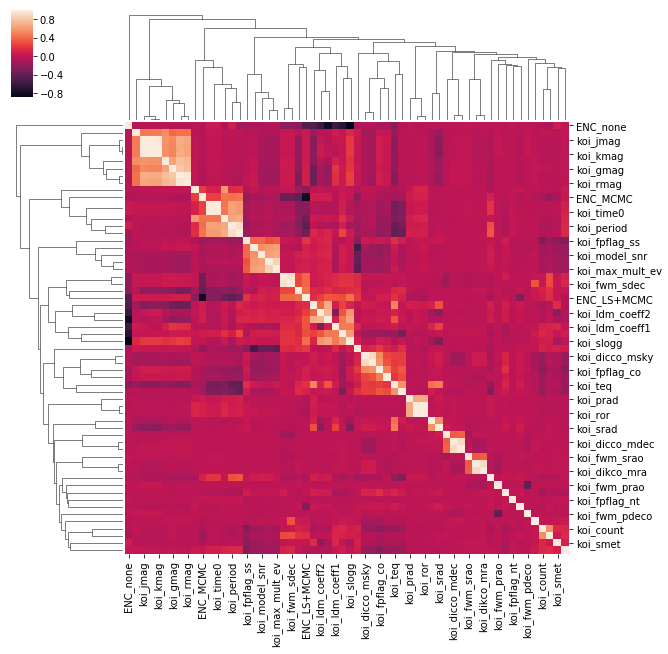

In [34]:
#Create Correlation Matrix Plot
df = exoTrainFillX.drop(['koi_eccen'], axis=1)
sns.clustermap(df.corr())
plt.show()

In [35]:
#Identify Pairs with Highest Correlation
corrPairs = exoTrainFillX.corr().unstack().sort_values(kind="quicksort")
corrPairs = corrPairs.dropna()
corrPairs = corrPairs[::2]
corrPairs = corrPairs[corrPairs.index.get_level_values(0) != corrPairs.index.get_level_values(1)]
with pd.option_context('display.max_rows',20):
    print(corrPairs)

koi_slogg         ENC_none           -0.872938
ENC_MCMC          ENC_LS+MCMC        -0.798272
koi_steff         ENC_none           -0.788865
ENC_none          koi_incl           -0.669766
koi_ldm_coeff2    ENC_none           -0.594576
koi_ldm_coeff1    ENC_none           -0.574381
koi_bin_oedp_sig  koi_depth          -0.533225
ENC_LS+MCMC       ENC_none           -0.473874
koi_smass         ENC_none           -0.468296
koi_max_mult_ev   koi_bin_oedp_sig   -0.433032
                                        ...   
koi_dicco_msky    koi_dikco_msky      0.910938
koi_dicco_mdec    koi_dikco_mdec      0.918203
koi_period        koi_sma             0.930821
koi_fwm_sdec      koi_fwm_sra         0.947602
koi_rmag          koi_kepmag          0.968373
koi_jmag          koi_kmag            0.992330
koi_ror           koi_impact          0.993572
koi_jmag          koi_hmag            0.994957
koi_kmag          koi_hmag            0.998513
koi_time0         koi_time0bk         1.000000
Length: 1770,

#### exoTrainMiceX

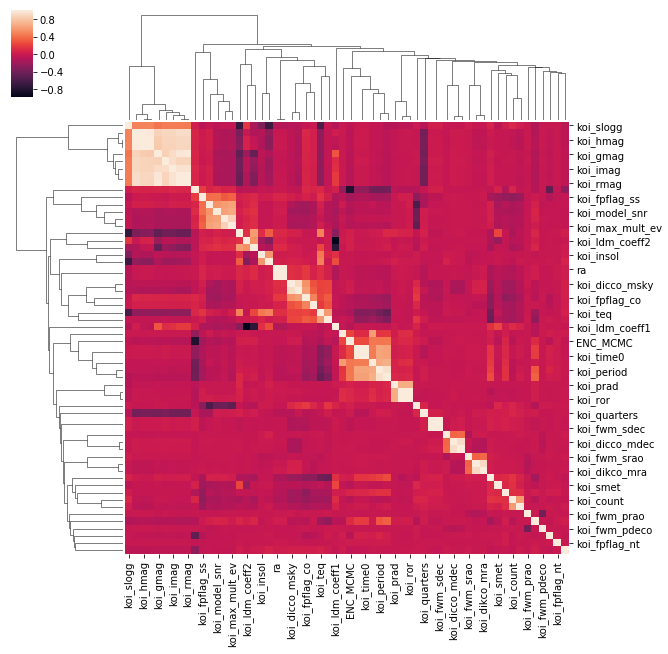

In [36]:
#Create Correlation Matrix Plot
df = exoTrainMiceX.drop(['koi_eccen'], axis=1)
sns.clustermap(df.corr())
plt.show()

In [46]:
#Identify Pairs with Highest Correlation
corrPairs = exoTrainMiceX.corr().unstack().sort_values(kind="quicksort")
corrPairs = corrPairs.dropna()
corrPairs = corrPairs[::2]
corrPairs = corrPairs[corrPairs.index.get_level_values(0) != corrPairs.index.get_level_values(1)]
with pd.option_context('display.max_rows',40):
    print(corrPairs)

koi_ldm_coeff1    koi_ldm_coeff2     -0.963306
ENC_MCMC          ENC_LS+MCMC        -0.798272
koi_ldm_coeff1    koi_steff          -0.733194
koi_smass         koi_slogg          -0.680420
koi_srad          koi_slogg          -0.649811
koi_depth         koi_bin_oedp_sig   -0.576249
koi_slogg         koi_teq            -0.565865
ENC_LS+MCMC       ENC_none           -0.473874
koi_bin_oedp_sig  koi_max_mult_ev    -0.473638
koi_smass         koi_gmag           -0.468624
koi_gmag          koi_steff          -0.442766
koi_sma           koi_teq            -0.442331
koi_rmag          koi_smass          -0.428971
koi_incl          koi_num_transits   -0.427746
koi_kepmag        koi_smass          -0.426763
koi_bin_oedp_sig  koi_model_snr      -0.422519
koi_max_sngle_ev  koi_bin_oedp_sig   -0.414964
koi_teq           koi_incl           -0.413151
koi_period        ENC_LS+MCMC        -0.412616
koi_imag          koi_smass          -0.402919
                                        ...   
koi_dicco_mra

In [38]:
corrPairs.koi_time0bk

koi_teq            -0.304163
ENC_LS+MCMC        -0.241935
koi_fpflag_co      -0.127282
koi_fpflag_ss      -0.116849
koi_max_mult_ev    -0.072565
ra                 -0.048618
koi_fwm_sra        -0.047863
koi_depth          -0.043911
koi_dikco_msky     -0.030795
koi_max_sngle_ev   -0.023109
koi_fwm_sdec       -0.015558
ENC_LS             -0.015427
koi_srad           -0.011820
koi_count          -0.006309
koi_smet           -0.003466
koi_dikco_mdec      0.000055
koi_bin_oedp_sig    0.003227
koi_fwm_sdeco       0.003738
koi_steff           0.004021
koi_imag            0.009606
koi_dikco_mra       0.010063
koi_kepmag          0.010327
koi_kmag            0.013283
koi_dicco_mra       0.013992
koi_fwm_srao        0.014296
koi_tce_plnt_num    0.021052
koi_zmag            0.021113
koi_fpflag_nt       0.022450
koi_impact          0.060841
ENC_none            0.063245
koi_ror             0.066625
koi_incl            0.170911
koi_duration        0.195283
koi_dor             0.461527
koi_period    

### Compare Variance of Complete Cases to Variance of KNN Imputation

In [64]:
describe = exoTrainX.describe()
describe

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_time0,koi_eccen,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_ldm_coeff2,koi_ldm_coeff1,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_quarters,koi_bin_oedp_sig,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky,ENC_LS,ENC_LS+MCMC,ENC_MCMC,ENC_none
count,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7.138000e+03,6880.0,6880.000000,7138.000000,6.880000e+03,6880.000000,6919.000000,6880.000000,6880.000000,6879.000000,6880.000000,6.919000e+03,6880.000000,6880.000000,6880.000000,6459.000000,6459.000000,6880.000000,7138.000000,6459.000000,6854.000000,6.459000e+03,6232.000000,6880.000000,6880.000000,6860.000000,6880.000000,6880.000000,7138.000000,7138.000000,7137.000000,7104.000000,7131.000000,7015.000000,6638.000000,7113.000000,7113.000000,7113.000000,6204.000000,6700.000000,6700.000000,6751.000000,6751.000000,6411.000000,6434.000000,6634.000000,6634.000000,6634.000000,6654.000000,6654.000000,6654.000000,7138.000000,7138.000000,7138.000000,7138.000000
mean,0.279350,0.311572,0.264640,0.160829,52.904674,162.807625,2.454996e+06,0.0,0.772025,5.825540,3.140646e+04,0.310654,7.125833,110.740603,0.192363,80.819686,1177.456831,9.984834e+03,55.448818,0.255746,0.404595,227.720350,1326.425758,337.218140,1.405296,434.719926,1.218413,9.154184e+30,0.378855,5729.886337,4.303248,-0.135732,1.799694,1.028795,292.159244,43.725833,14.237314,14.801566,14.195247,14.054991,13.964868,12.970867,12.599884,12.522229,0.123121,19.478459,43.745480,-0.411174,-0.187236,-0.000148,-0.000978,-0.026383,-0.057332,2.094591,-0.025997,-0.093552,2.077560,0.010787,0.854441,0.097927,0.036845
std,5.516569,0.463168,0.441172,0.367399,113.916120,63.837801,6.383780e+01,0.0,3.296488,6.986237,9.377182e+04,3.255301,49.744271,3281.859522,0.296724,16.803463,920.914562,1.838363e+05,146.971039,0.065239,0.107301,873.866399,4701.900113,905.991334,0.895592,580.493772,0.630935,4.150866e+30,0.535430,828.689529,0.446992,0.284691,6.475944,0.360691,4.752789,3.570038,1.412160,1.528974,1.409795,1.316052,1.244703,1.315037,1.291807,1.291427,0.234263,0.318395,3.567829,23.513407,23.838603,0.067954,0.108419,2.668914,2.870015,3.312919,2.671500,2.860505,3.318466,0.103308,0.352688,0.297236,0.188394
min,0.000000,0.000000,0.000000,0.000000,0.241843,120.515914,2.454954e+06,0.0,0.000000,0.104600,8.000000e-01,0.001289,0.000040,0.080000,0.005900,2.290000,92.000000,2.000000e-02,0.373000,-0.120600,0.125400,2.538761,7.105086,0.000000,1.000000,0.000000,1.000000,1.000000e+15,-1.000000,2661.000000,0.047000,-2.500000,0.116000,0.000000,279.852720,36.577381,6.966000,7.225000,7.101000,7.627000,7.657000,5.431000,5.054000,4.941000,0.000000,18.657036,36.576888,-742.430000,-417.900000,-4.000000,-6.000000,-25.100000,-75.900000,0.000000,-27.800000,-76.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2.145529,132.500835,2.454966e+06,0.0,0.232750,2.516775,1.820000e+02,0.013201,0.173525,1.510000,0.032000,81.395000,583.000000,2.759500e+01,4.059000,0.229100,0.323800,4.257893,12.894146,15.400000,1.000000,47.000000,1.000000,1.111100e+31,0.095350,5325.000000,4.204750,-0.280000,0.831000,0.845000,288.855388,40.704221,13.406000,13.859750,13.362000,13.268000,13.247250,12.239000,11.903000,11.832000,0.000000,19.257104,40.714969,-0.548950,-0.620000,-0.000250,-0.000261,-0.290000,-0.320000,0.130000,-0.280000,-0.350000,0.180000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,7.811275,136.264840,2.454969e+06,0.0,0.591500,3.879280,5.130000e+02,0.024529,0.750410,2.710000,0.074300,87.910000,954.000000,1.983

In [66]:
print("=== Raw Data ===")
print("Standard Deviation:", describe.iloc[2,:].mean())
print("Mean:", describe.iloc[1,:].mean())
print("Max:", describe.iloc[7,:].mean())
print("Min:", describe.iloc[3,:].mean())

=== Raw Data ===
Standard Deviation: 6.804698875309316e+28
Mean: 1.5006858888008362e+29
Max: 1.8214918032786888e+29
Min: 16393442663227.662


In [67]:
describe = exoTrainMiceX.describe()
describe

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_time0,koi_eccen,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_ldm_coeff2,koi_ldm_coeff1,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_quarters,koi_bin_oedp_sig,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky,ENC_LS,ENC_LS+MCMC,ENC_MCMC,ENC_none
count,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7.138000e+03,7138.0,7138.000000,7138.000000,7.138000e+03,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7.138000e+03,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7.138000e+03,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000
mean,0.279350,0.311572,0.264640,0.160829,52.904674,162.807625,2.454996e+06,0.0,0.766787,5.825540,3.100349e+04,0.305195,7.352808,108.443331,0.194426,80.870870,1172.655422,9.849335e+03,56.535317,0.255780,0.404585,211.387049,1227.350868,332.780420,1.405296,420.348318,1.221860,9.162170e+30,0.391553,5729.490252,4.303945,-0.135460,1.787802,1.028665,292.159244,43.725833,14.237476,14.802245,14.195154,14.051874,13.958482,12.970926,12.599909,12.522275,0.130702,19.476288,43.725568,-0.362894,-0.172050,-0.000153,-0.000857,-0.017884,-0.046578,2.085440,-0.020131,-0.084562,2.067881,0.010787,0.854441,0.097927,0.036845
std,5.516569,0.463168,0.441172,0.367399,113.916120,63.837801,6.383780e+01,0.0,3.237313,6.986237,9.270079e+04,3.196530,50.391288,3222.494458,0.295103,16.617195,910.357590,1.810382e+05,146.761313,0.064542,0.106163,835.765392,4492.203340,891.503682,0.895592,559.067809,0.624289,4.010854e+30,0.507466,820.941735,0.441191,0.281694,6.361503,0.356529,4.752789,3.570038,1.412128,1.526729,1.409375,1.307794,1.215921,1.315114,1.291649,1.291234,0.224622,0.314605,3.569874,22.911959,23.221272,0.064444,0.103017,2.592566,2.785470,3.213889,2.599003,2.776610,3.222173,0.103308,0.352688,0.297236,0.188394
min,0.000000,0.000000,0.000000,0.000000,0.241843,120.515914,2.454954e+06,0.0,0.000000,0.104600,8.000000e-01,0.001289,0.000040,0.080000,0.005900,2.290000,92.000000,2.000000e-02,0.373000,-0.120600,0.125400,2.538761,7.105086,0.000000,1.000000,0.000000,1.000000,1.000000e+15,-1.000000,2661.000000,0.047000,-2.500000,0.116000,0.000000,279.852720,36.577381,6.966000,7.225000,7.101000,7.627000,7.657000,5.431000,5.054000,4.941000,0.000000,18.657036,36.576888,-742.430000,-417.900000,-4.000000,-6.000000,-25.100000,-75.900000,0.000000,-27.800000,-76.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2.145529,132.500835,2.454966e+06,0.0,0.242000,2.516775,1.890000e+02,0.013452,0.182523,1.550000,0.032825,81.375000,587.000000,2.941750e+01,4.209250,0.229100,0.323900,4.389625,13.578743,15.700000,1.000000,55.000000,1.000000,1.093193e+31,0.132200,5332.000000,4.207250,-0.280000,0.835000,0.848000,288.855388,40.704221,13.406000,13.866000,13.362000,13.277000,13.283076,12.239000,11.903000,11.832568,0.000000,19.260173,40.704377,-0.550000,-0.635100,-0.000270,-0.000279,-0.290000,-0.320000,0.140000,-0.280000,-0.360000,0.190000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,7.811275,136.264840,2.454969e+06,0.0,0.591000,3.879280,5.435000e+02,0.025159,0.790385,2.820000,0.076676,87.840000,952.000000,2.112

In [68]:
print("=== KNN Imputation ===")
print("Standard Deviation:", describe.iloc[2,:].mean())
print("Mean:", describe.iloc[1,:].mean())
print("Max:", describe.iloc[7,:].mean())
print("Min:", describe.iloc[3,:].mean())

#6.805 / 6.5752 = 1.0349

=== KNN Imputation ===
Standard Deviation: 6.575170717082109e+28
Mean: 1.501995131603026e+29
Max: 1.8214918032786888e+29
Min: 16393442663227.662


In [69]:
describe = exoTrainFillX.describe()
describe

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_time0,koi_eccen,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_ldm_coeff2,koi_ldm_coeff1,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_quarters,koi_bin_oedp_sig,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky,ENC_LS,ENC_LS+MCMC,ENC_MCMC,ENC_none
count,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7.138000e+03,7138.0,7138.000000,7138.000000,7.138000e+03,7138.000000,7138.000000,7138.000000,7138.000000,7138.00000,7138.000000,7.138000e+03,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7.138000e+03,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000,7138.000000
mean,0.279350,0.311572,0.264640,0.160829,52.904674,162.807625,2.454996e+06,0.0,0.744120,5.825540,3.027129e+04,0.299425,6.907206,106.737931,0.185410,77.88717,1134.898151,9.678491e+03,53.444644,0.246503,0.389971,206.058523,1200.249926,325.029532,1.405296,393.367330,1.169936,8.283395e+30,0.330768,5522.782012,4.147709,-0.130446,1.734645,0.991609,292.159244,43.725833,14.235319,14.731062,14.181326,13.812800,12.986662,12.925438,12.555755,12.478371,0.107011,18.283227,41.061182,-0.388881,-0.177085,-0.000133,-0.000882,-0.024520,-0.053284,1.946696,-0.024234,-0.087208,1.936689,0.010787,0.854441,0.097927,0.036845
std,5.516569,0.463168,0.441172,0.367399,113.916120,63.837801,6.383780e+01,0.0,3.239563,6.986237,9.224778e+04,3.196447,48.990536,3222.060801,0.293516,22.37291,930.447336,1.810020e+05,144.660858,0.079883,0.129619,833.939616,4489.546759,891.689492,0.895592,566.730197,0.662542,4.775415e+30,0.515946,1343.820572,0.915315,0.280324,6.366684,0.402832,4.752789,3.570038,1.422081,1.834492,1.477503,2.246766,3.761138,1.520045,1.488985,1.486368,0.222310,4.685180,11.053691,22.867211,23.183317,0.064400,0.102933,2.572961,2.766862,3.238567,2.579334,2.761909,3.246271,0.103308,0.352688,0.297236,0.188394
min,0.000000,0.000000,0.000000,0.000000,0.241843,120.515914,2.454954e+06,0.0,0.000000,0.104600,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000,-0.120600,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,-1.000000,0.000000,0.000000,-2.500000,0.000000,0.000000,279.852720,36.577381,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-742.430000,-417.900000,-4.000000,-6.000000,-25.100000,-75.900000,0.000000,-27.800000,-76.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2.145529,132.500835,2.454966e+06,0.0,0.193000,2.516775,1.580000e+02,0.012334,0.147712,1.420000,0.028900,79.64000,545.000000,2.194750e+01,3.550000,0.223850,0.319000,3.891738,10.717376,14.200000,1.000000,26.000000,1.000000,1.111110e+30,0.000100,5254.000000,4.162000,-0.260000,0.813250,0.825000,288.855388,40.704221,13.406000,13.841500,13.360000,13.214000,12.982000,12.232250,11.888000,11.821000,0.000000,19.188893,40.324792,-0.489075,-0.551500,-0.000200,-0.000200,-0.220000,-0.250000,0.080000,-0.239500,-0.300000,0.140000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,7.811275,136.264840,2.454969e+06,0.0,0.561450,3.879280,4.730000e+02,0.023241,0.699085,2.590000,0.069500,87.69000,926.000000,1.777450e+02,11

In [70]:
print("=== Zero Filled ===")
print("Standard Deviation:", describe.iloc[2,:].mean())
print("Mean:", describe.iloc[1,:].mean())
print("Max:", describe.iloc[7,:].mean())
print("Min:", describe.iloc[3,:].mean())

=== Zero Filled ===
Standard Deviation: 7.828549687321118e+28
Mean: 1.3579336166663774e+29
Max: 1.8214918032786888e+29
Min: 40229.71242389088
